In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV


# Data Cleaning

In [ ]:
df = pd.read_csv('hotel_bookings.csv')

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df['agent'].fillna(df['agent'].median(),inplace=True)

In [ ]:
df['company'].notnull().sum()

6797

In [ ]:
df.drop('company',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [ ]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
df['children'].fillna(df['children'].median(),inplace=True)

In [ ]:
df['country'].fillna(df['country'].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
df.duplicated().sum()

32020

In [ ]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [ ]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [ ]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

# EDA

<Axes: >

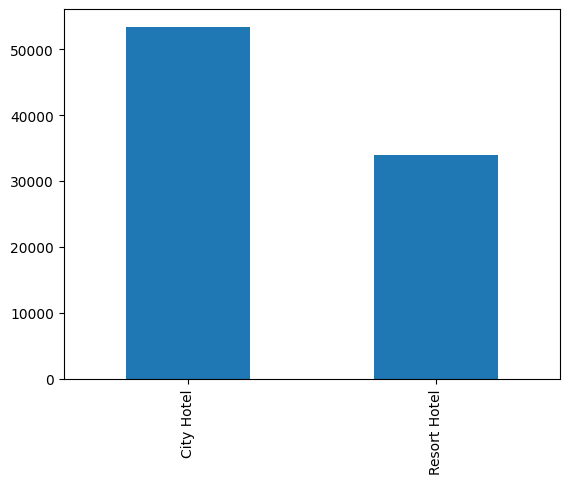

In [ ]:
df['hotel'].value_counts().plot(kind='bar')

In [ ]:
df['arrival_date_month'].value_counts()

August       11257
July         10055
May           8354
April         7905
June          7765
March         7510
October       6932
September     6689
February      6091
December      5128
November      4993
January       4691
Name: arrival_date_month, dtype: int64

In [ ]:
 df.groupby(['hotel','arrival_date_year'])['days_in_waiting_list'].count()


hotel         arrival_date_year
City Hotel    2015                  6550
              2016                 26758
              2017                 20118
Resort Hotel  2015                  6760
              2016                 15619
              2017                 11565
Name: days_in_waiting_list, dtype: int64

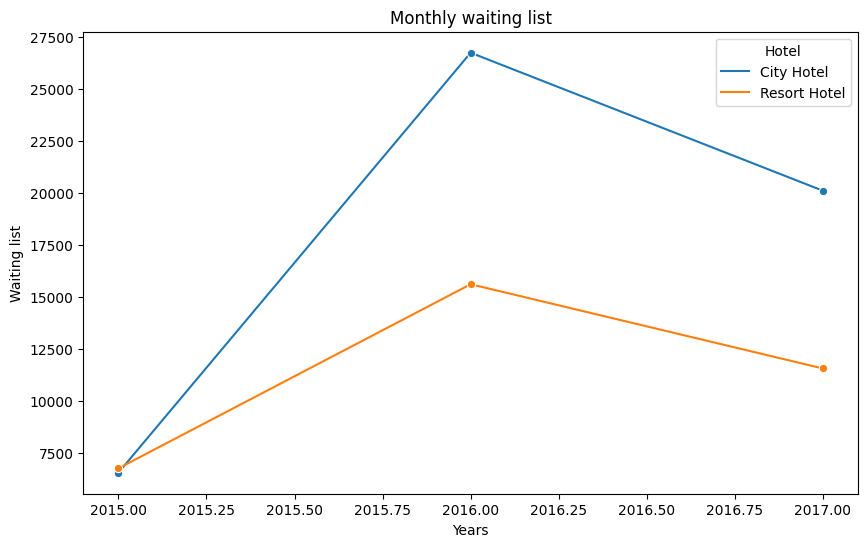

In [ ]:
df_grouped =  df.groupby(['hotel','arrival_date_year'])['days_in_waiting_list'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='arrival_date_year', y='days_in_waiting_list', hue='hotel' ,marker='o')
plt.xlabel('Years')
plt.ylabel('Waiting list')
plt.title('Monthly waiting list')
plt.legend(title='Hotel', loc='upper right')
plt.show()

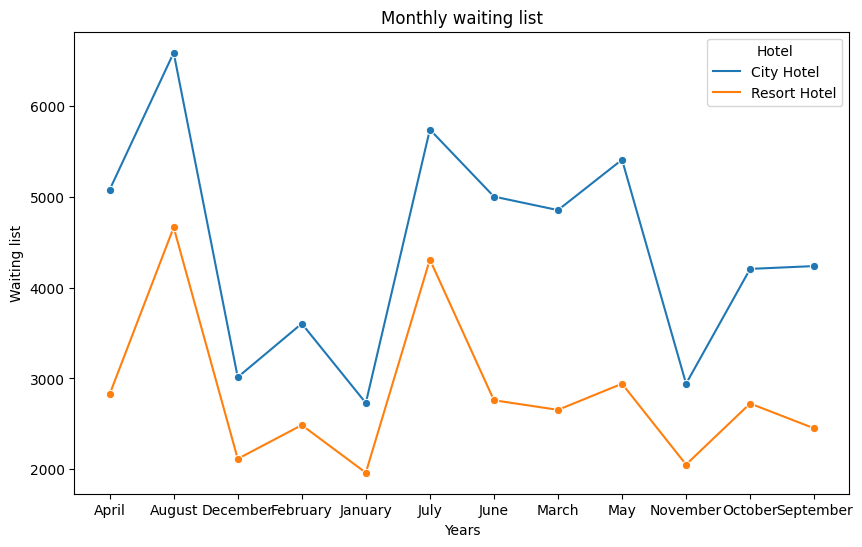

In [ ]:
df_grouped =  df.groupby(['hotel','arrival_date_month'])['days_in_waiting_list'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='arrival_date_month', y='days_in_waiting_list', hue='hotel' ,marker='o')
plt.xlabel('Years')
plt.ylabel('Waiting list')
plt.title('Monthly waiting list')
plt.legend(title='Hotel', loc='upper right')
plt.show()

<Axes: xlabel='hotel'>

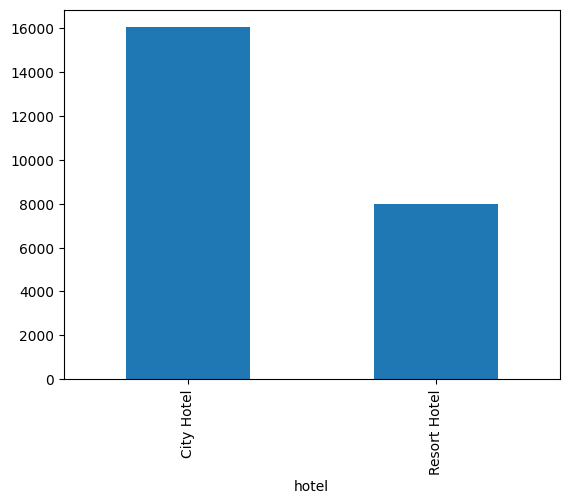

In [ ]:
 df[df['is_canceled']==1].groupby('hotel')['is_canceled'].count().plot(kind='bar')

<Axes: xlabel='hotel,is_canceled'>

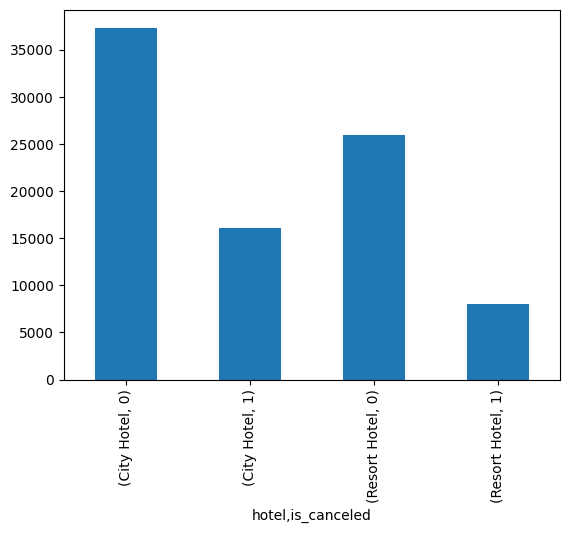

In [ ]:
df.groupby(['hotel','is_canceled'])['is_repeated_guest'].count().plot(kind='bar')

<Axes: xlabel='hotel', ylabel='count'>

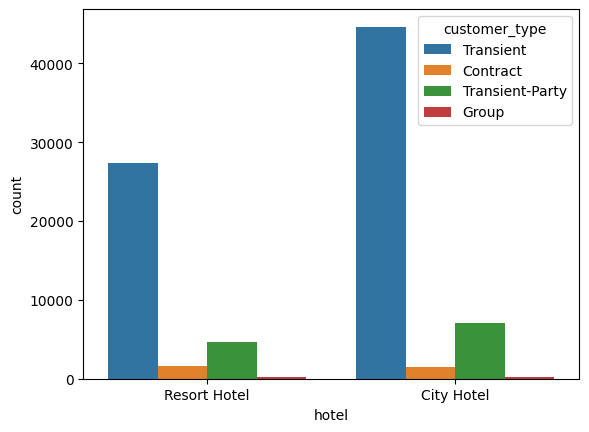

In [ ]:
sns.countplot(x='hotel', hue='customer_type', data=df)

<Axes: xlabel='hotel', ylabel='count'>

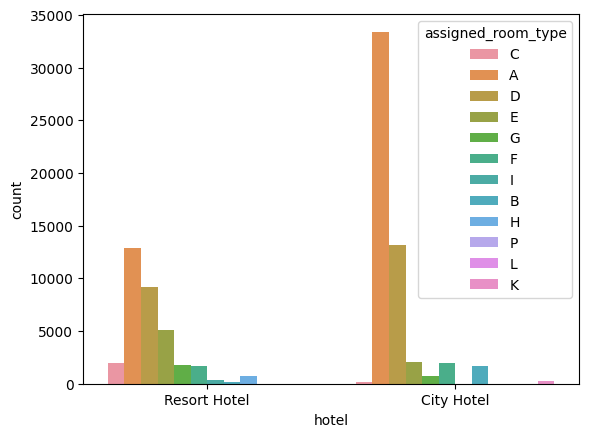

In [ ]:
sns.countplot(x='hotel', hue='assigned_room_type', data=df)

In [ ]:
numerical_features = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']
correlation_matrix = df[numerical_features].corr()

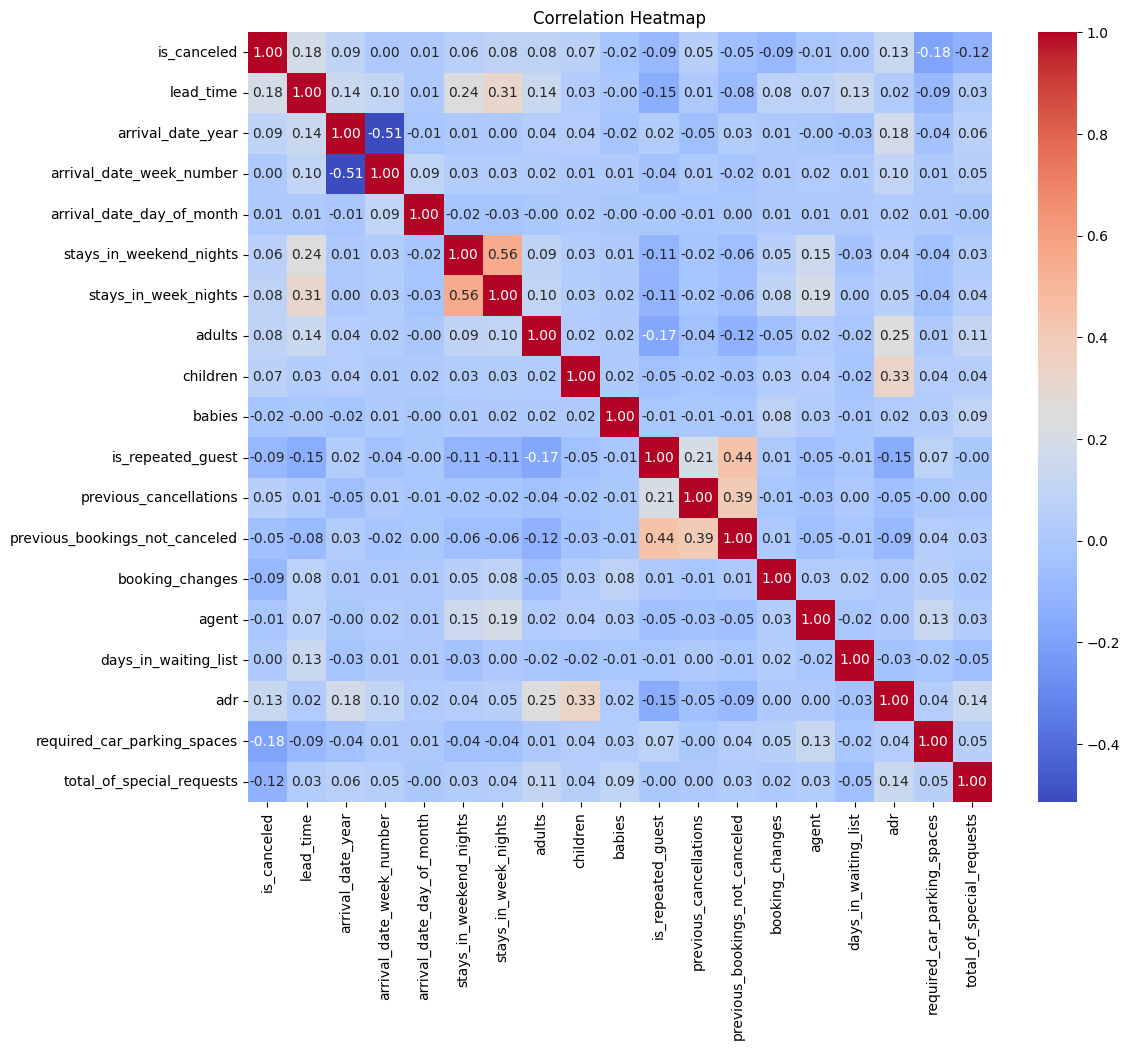

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['reservation_status']= label_encoder.fit_transform(df['reservation_status'])

df['reservation_status'].unique()

array([1, 0, 2])

In [ ]:
df['deposit_type']= label_encoder.fit_transform(df['deposit_type'])

df['deposit_type'].unique()

array([0, 2, 1])

In [ ]:
df['customer_type']= label_encoder.fit_transform(df['customer_type'])

df['customer_type'].unique()

array([2, 0, 3, 1])

In [ ]:
df['arrival_date_month'].value_counts()

August       11257
July         10055
May           8354
April         7905
June          7765
March         7510
October       6932
September     6689
February      6091
December      5128
November      4993
January       4691
Name: arrival_date_month, dtype: int64

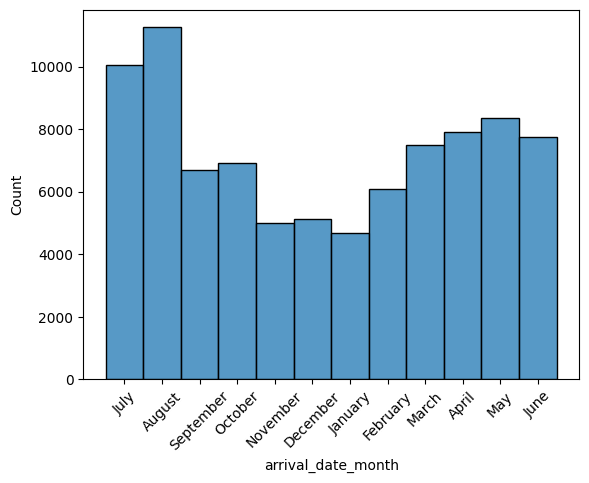

In [ ]:
sns.histplot(x='arrival_date_month', data=df, bins=5)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = df.drop(df[df['meal'] == 'Undefined'].index, axis=0)

In [ ]:
df['meal'].value_counts()

BB    67955
SC     9481
HB     9084
FB      360
Name: meal, dtype: int64

In [ ]:
df = df.drop(df[df['market_segment'] == 'Undefined'].index, axis=0)

In [ ]:
df['market_segment'].value_counts()

Online TA        51597
Offline TA/TO    13720
Direct           11727
Groups            4714
Corporate         4197
Complementary      696
Aviation           227
Name: market_segment, dtype: int64

In [ ]:
df = df.drop(df[df['distribution_channel'] == 'Undefined'].index, axis=0)

In [ ]:
df['distribution_channel'].value_counts()

TA/TO        68810
Direct       12828
Corporate     5056
GDS            181
Name: distribution_channel, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['hotel','meal','market_segment','distribution_channel'])

In [ ]:
df['arrival_date_month'] = df['arrival_date_month'].astype('category')

In [ ]:
df['reserved_room_type'].value_counts().sort_index()

A    56169
B      995
C      891
D    17344
E     6015
F     2811
G     2042
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df['assigned_room_type'] = df['assigned_room_type'].astype('category')

In [ ]:
df['assigned_room_type'] = df['assigned_room_type'].astype('category')

In [ ]:
df['reserved_room_type'].replace(['A', 'B','C','D','E','F','G','H','I','K','L','P'],[1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)

In [ ]:
df['assigned_room_type'].replace(['A', 'B','C','D','E','F','G','H','I','K','L','P'],[1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)

In [ ]:
df['reserved_room_type'].value_counts().sort_index()

1     56169
2       995
3       891
4     17344
5      6015
6      2811
7      2042
8       596
11        6
12        6
Name: reserved_room_type, dtype: int64

In [ ]:
df['assigned_room_type'].value_counts().sort_index()

1     46055
2      1813
3      2087
4     22345
5      7143
6      3603
7      2487
8       704
9       355
10      276
11        1
12        6
Name: assigned_room_type, dtype: int64

In [ ]:
df['arrival_date_month'].value_counts()

August       11211
July         10013
May           8348
April         7840
June          7744
March         7453
October       6930
September     6685
February      6028
December      5027
November      4967
January       4629
Name: arrival_date_month, dtype: int64

In [ ]:
df['arrival_date_month'].replace(['January', 'February','March','April','May','June','July','August','September','October','November','December'],[1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)

In [ ]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO
0,0,342,2015,7,27,1,0,0,2,0.0,...,0,0,1,0,0,0,0,1,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,0,0,1,0,0,0,0,1,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,0,0,1,0,0,0,0,1,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,0,1,0,0,0,0,1,0,0,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,0,0,0,0,1,0,0,0,0,1
119386,0,102,2017,8,35,31,2,5,3,0.0,...,0,0,0,0,0,1,0,0,0,1
119387,0,34,2017,8,35,31,2,5,2,0.0,...,0,0,0,0,0,1,0,0,0,1
119388,0,109,2017,8,35,31,2,5,2,0.0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Create a TF-IDF vectorizer for 'genre' and 'song_name'
# tfidf_vectorizer = TfidfVectorizer(max_features=5)

# # Transform country into numerical features
# country_tfidf = tfidf_vectorizer.fit_transform(df['country'])


# # Convert the sparse matrices to DataFrames and concatenate them with the original data
# country_df = pd.DataFrame(country_tfidf.toarray(), columns=[f'country_tfidf_{i}' for i in range(5)])


# df = pd.concat([df, country_df], axis=1)

In [ ]:
X = df.drop(['is_canceled','country','reservation_status','babies','is_repeated_guest','days_in_waiting_list','meal_FB','market_segment_Aviation','market_segment_Complementary','distribution_channel_GDS'], axis=1)
y = df['is_canceled']

In [ ]:
# ,'reservation_status_date',

In [ ]:
X.iloc[:,12:]

,assigned_room_type,booking_changes,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,hotel_City Hotel,...,meal_HB,meal_SC,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_TA/TO
0,3,3,0,14.0,2,0.00,0,0,2015-07-01,0,...,0,0,0,1,0,0,0,0,1,0
1,3,4,0,14.0,2,0.00,0,0,2015-07-01,0,...,0,0,0,1,0,0,0,0,1,0
2,3,0,0,14.0,2,75.00,0,0,2015-07-02,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,304.0,2,75.00,0,0,2015-07-02,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,240.0,2,98.00,0,1,2015-07-03,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,0,394.0,2,96.14,0,0,2017-09-06,1,...,0,0,0,0,0,1,0,0,0,1
119386,5,0,0,9.0,2,225.43,0,2,2017-09-07,1,...,0,0,0,0,0,0,1,0,0,1
119387,4,0,0,9.0,2,157.71,0,4,2017-09-07,1,...,0,0,0,0,0,0,1,0,0,1
119388,1,0,0,89.0,2,104.40,0,0,2017-09-07,1,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
X['reservation_status_date'] = pd.to_numeric(pd.to_datetime(X['reservation_status_date']))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

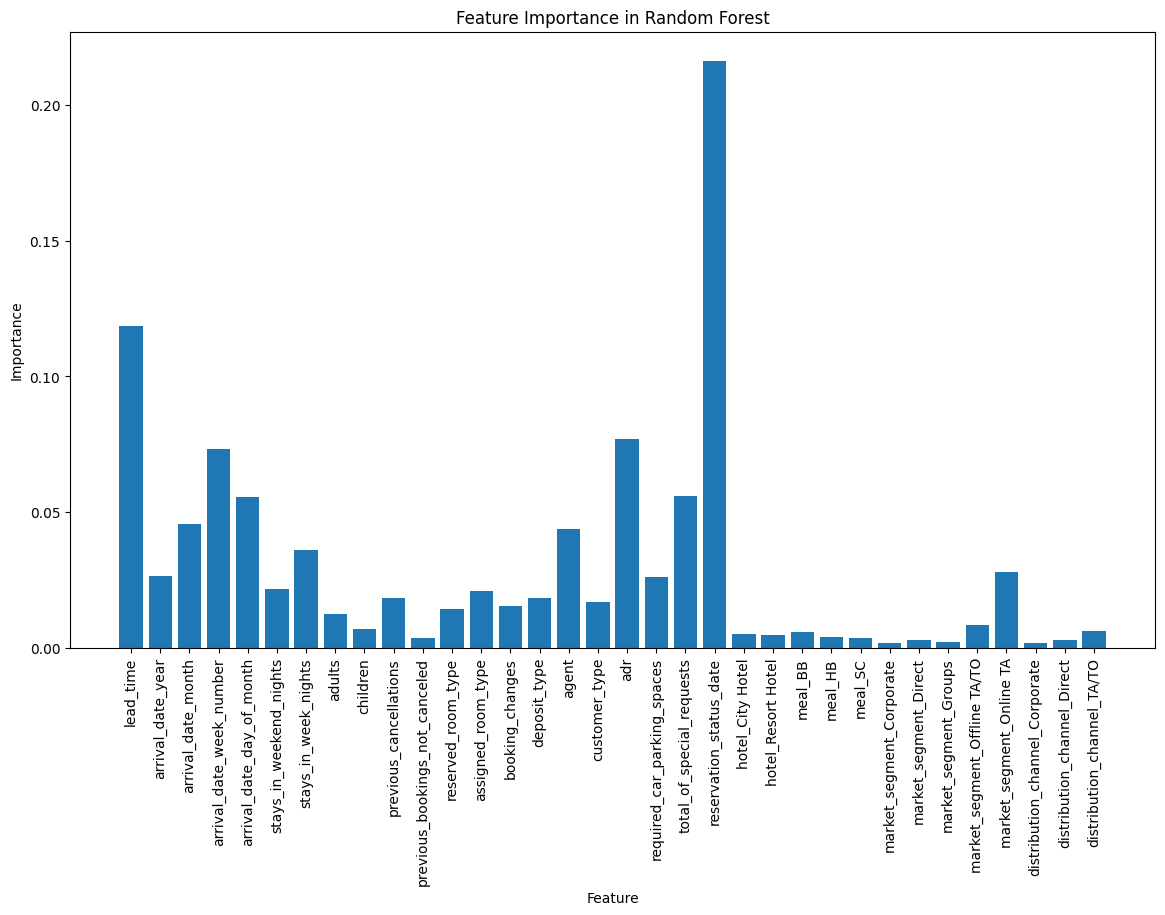

In [ ]:
feature_importances = rf_classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(14,8))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

In [ ]:
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9145323741007194
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12641
           1       0.94      0.73      0.82      4734

    accuracy                           0.91     17375
   macro avg       0.92      0.86      0.88     17375
weighted avg       0.92      0.91      0.91     17375



Text(50.722222222222214, 0.5, 'True label')

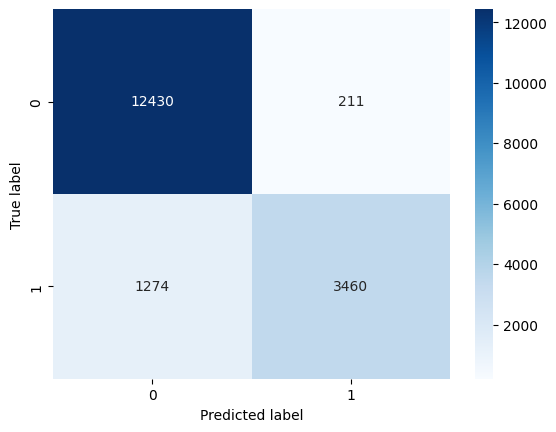

In [ ]:
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
 clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train, y_train)

In [ ]:
best_clf.best_estimator_

In [ ]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9052086330935252
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     12641
           1       0.83      0.83      0.83      4734

    accuracy                           0.91     17375
   macro avg       0.88      0.88      0.88     17375
weighted avg       0.91      0.91      0.91     17375



Text(50.722222222222214, 0.5, 'True label')

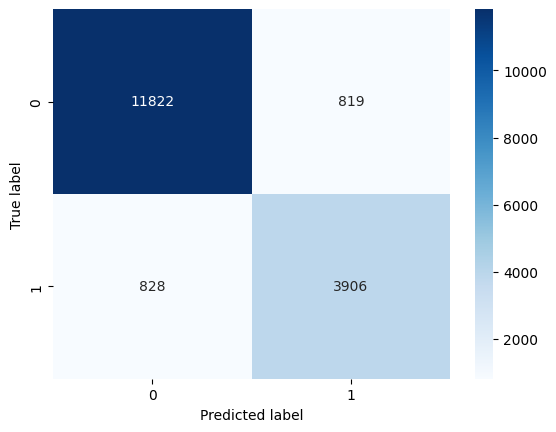

In [ ]:
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
y = (df['is_canceled'] == 1).astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(solver='lbfgs',max_iter=3000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.7275395683453237
Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     12641
           1       0.00      0.00      0.00      4734

    accuracy                           0.73     17375
   macro avg       0.36      0.50      0.42     17375
weighted avg       0.53      0.73      0.61     17375



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
# best_clf = clf.fit(X_train, y_train)

In [ ]:
# best_clf.best_estimator_

In [ ]:
# print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Text(50.722222222222214, 0.5, 'True label')

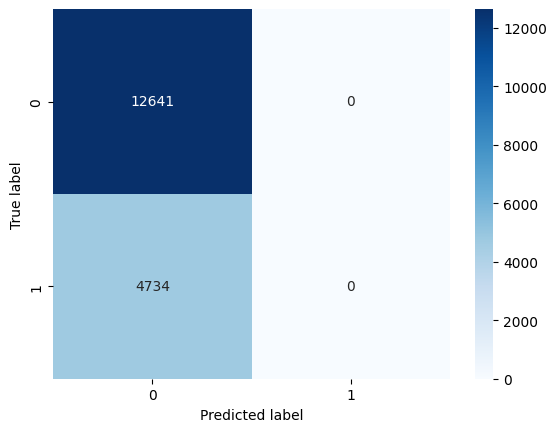

In [ ]:
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



In [ ]:
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')